Лабораторная Работа №2: Методы классификации данных


# Выполнил: Балашов Максим Александрович

# Группы: 18-Ивт-2


Вариант 1

##### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [183]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import interp
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn.datasets import make_classification
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from matplotlib.pylab import rc, plot
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
warnings.filterwarnings("ignore")

df_mushrooms= pd.read_csv('mushrooms.csv')

##### cap-shap - Форма шляпки
##### cap-surface - Поверхность шляпки
##### cap-color - Цвет шляпки
##### bruises - Пятна
##### odor - Запах
##### gill-attachment - Форма жабер
##### gill-spacing - Расстояние между жабрами
##### gill-size - Размер жабер
##### gill-color - Цвет жабер
##### stalk-shape - Форма ножки
##### stalk-root - Корень
##### stalk-surface-above-ring - Форма ножки выше юбки
##### stalk-surface-below-ring - Форма ножки ниже юбки
##### stalk-color-above-ring - Цвет ножки выше юбки
##### stalk-color-below-ring - Цвет ножки ниже юбки
##### veil-type - Форма юбки
##### veil-color - Цвет юбки
##### ring-number - Количество колец
##### ring-type - Тип кольца
##### spore-print-color - Цвет спор
##### population - Популяция
##### habitat - Среда обитания

In [88]:
df_mushrooms.shape

(8124, 23)

##### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [89]:
df_mushrooms.drop_duplicates()
df_mushrooms.dropna()
df_mushrooms.shape

(8124, 23)

In [90]:
df_mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


##### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

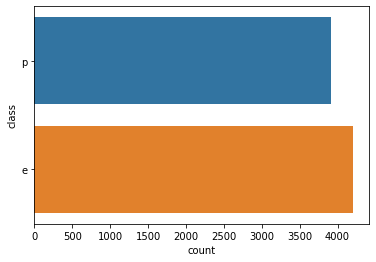

In [91]:
sns.countplot(data=df_mushrooms, y='class')
plt.show()

Данные по классам сбалансированны

##### 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [4]:
df_mushrooms.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

AttributeError: 'LabelEncoder' object has no attribute 'classes_'

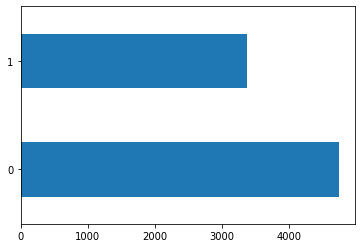

In [5]:
df_mushrooms.drop('veil-type', axis = 1, inplace = True)
mapped_education = pd.Series(LabelEncoder().fit_transform(df_mushrooms['bruises']))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(LabelEncoder().classes_)))

In [185]:
for column in list(df_mushrooms):
    label_encoder = LabelEncoder()
    df_mushrooms[column] = pd.Series(label_encoder.fit_transform(df_mushrooms[column]))
df_mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


##### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

                             class  cap-shape  cap-surface  cap-color  \
class                     1.000000   0.052951     0.178446  -0.031384   
cap-shape                 0.052951   1.000000    -0.050454  -0.048203   
cap-surface               0.178446  -0.050454     1.000000  -0.019402   
cap-color                -0.031384  -0.048203    -0.019402   1.000000   
bruises                  -0.501530  -0.035374     0.070228  -0.000764   
odor                     -0.093552  -0.021935     0.045233  -0.387121   
gill-attachment           0.129200   0.078865    -0.034180   0.041436   
gill-spacing             -0.348387   0.013196    -0.282306   0.144259   
gill-size                 0.540024   0.054050     0.208100  -0.169464   
gill-color               -0.530566  -0.006039    -0.161017   0.084659   
stalk-shape              -0.102019   0.063794    -0.014123  -0.456496   
stalk-root               -0.379361   0.030191    -0.126245   0.321274   
stalk-surface-above-ring -0.334593  -0.030417     0

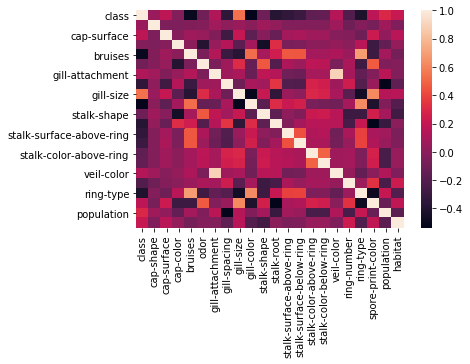

In [38]:
corr_matrix = df_mushrooms.corr()
sns.heatmap(corr_matrix);
print(corr_matrix)

In [186]:
df_mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


#### 7.	Заполните пропущенные значения в данных;

In [187]:
df_mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

Отсутвуют!

#### 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

In [188]:
categorical_columns = [c for c in df_mushrooms.columns if df_mushrooms[c].dtype.name == 'object']
numerical_columns   = [c for c in df_mushrooms.columns if df_mushrooms[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

[]
['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [189]:
df_mushrooms.count(axis=0)

class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

In [190]:
df_mushrooms_nonbinary = pd.get_dummies(df_mushrooms['class'])
print( df_mushrooms_nonbinary.columns)

Int64Index([0, 1], dtype='int64')


In [191]:
df_mushrooms = df_mushrooms.fillna(df_mushrooms.median(axis=0), axis=0)

In [193]:
df_mushrooms.count(axis=0)

class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

In [194]:
df_mushrooms['class'].describe()

count    8124.000000
mean        0.482029
std         0.499708
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: class, dtype: float64

In [195]:
df_mushrooms['class'] = df_mushrooms['class'].fillna('b')

In [153]:
df_mushrooms.describe(include=[object])

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [175]:
df_mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [174]:
binary_columns    = [c for c in categorical_columns if df_mushrooms_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if df_mushrooms_describe[c]['unique'] > 2]
print (binary_columns, nonbinary_columns)

['class', 'bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape'] ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [173]:
df_mushrooms.at[df_mushrooms['class'] == 'b', 'class'] = 0
df_mushrooms.at[df_mushrooms['class'] == 'a', 'class'] = 1
df_mushrooms['class'].describe()

count     8124
unique       2
top          e
freq      4208
Name: class, dtype: object

In [171]:
df_mushrooms_nonbinary = pd.get_dummies(df_mushrooms[nonbinary_columns])
print (df_mushrooms_nonbinary.columns)

Index(['cap-color_b', 'cap-color_c', 'cap-color_e', 'cap-color_g',
       'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u',
       'cap-color_w', 'cap-color_y',
       ...
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_f', 'stalk-surface-below-ring_k',
       'stalk-surface-below-ring_s', 'stalk-surface-below-ring_y',
       'veil-color_n', 'veil-color_o', 'veil-color_w', 'veil-color_y'],
      dtype='object', length=106)


In [177]:
df_mushrooms_numerical = df_mushrooms[numerical_columns]
df_mushrooms_numerical = (df_mushrooms_numerical - df_mushrooms_numerical.mean()) / df_mushrooms_numerical.std()

In [197]:
df_mushrooms = pd.concat((df_mushrooms_numerical, df_mushrooms[binary_columns], df_mushrooms_nonbinary), axis=1)
df_mushrooms = pd.DataFrame(df_mushrooms, dtype=float)
print (df_mushrooms.shape)
print (df_mushrooms.columns)

(8124, 8)
Index([          'class',         'bruises', 'gill-attachment',
          'gill-spacing',       'gill-size',     'stalk-shape',
                       0,                 1],
      dtype='object')


In [211]:
X_data, Y_data = df_mushrooms.drop('class', axis=1), df_mushrooms['class']
(X_train, 
X_test,
y_train,
y_test) = train_test_split(X_data, Y_data, test_size = 0.3, random_state = 123)

print(X_train.shape)
print(X_test.shape)

(5686, 7)
(2438, 7)


In [212]:
from sklearn.linear_model import Perceptron
slf = Perceptron()
paramsearch = GridSearchCV(estimator=slf, param_grid=dict(alpha=np.linspace(0,1,20)[1:],max_iter=[x for x in range(1,50)]), n_jobs=-1)
paramsearch.fit(X_train, y_train)
best_score = paramsearch.best_score_
selected_alpha = paramsearch.best_estimator_.alpha
selected_max_iter = paramsearch.best_estimator_.max_iter
print('best score:',best_score,'| alpha:',selected_alpha, '| max_iter:', selected_max_iter)
perceptron = sk.linear_model.Perceptron(alpha=selected_alpha,max_iter=selected_max_iter)
perceptron.fit(X_train, y_train)
test_score  = np.mean(y_test == perceptron.predict(X_test))
print('test score: ', test_score)

best score: 1.0 | alpha: 0.05263157894736842 | max_iter: 1
test score:  1.0


In [213]:
dts = DecisionTreeClassifier()
params = {'max_depth': list(range(1,22)), 'max_features': list(range(1,22))}
dtc_grid = GridSearchCV(dts, params)
dtc_grid.fit(X_train, y_train)
best_depth = dtc_grid.best_estimator_.max_depth
best_features = dtc_grid.best_estimator_.max_features
best_score = dtc_grid.best_score_
print('best score: ', best_score)
print('features number: ', best_features)
print('depth: ', best_depth)

best score:  1.0
features number:  3
depth:  1


In [214]:
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(X_train, y_train)
best_score = np.mean(y_test==dtc.predict(X_test))
print('test score', best_score)

test score 0.7616899097621


In [215]:
plt.figure(figsize=(10,8))
y_test_invers = []
for i, y in enumerate(y_test.reset_index(drop=True)):
    y_test_invers.append(1-y)
    
probas_dts0 = dts.fit(X_train, y_train).predict_proba (X_test)
probas_dts1 = dts.fit(X_train, y_train).predict_proba (X_test)
clf_isotonic = CalibratedClassifierCV(slf, cv=10, method='isotonic')
clf_isotonic.fit(X_train, y_train)
probas_slf0 = clf_isotonic.predict_proba(X_test)
clf_isotonic.fit(X_train, y_train)
probas_slf1 = clf_isotonic.predict_proba(X_test)

<Figure size 720x576 with 0 Axes>

In [216]:
def addPlotPr(prob, occupancy, label, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area = %f)' % (label, aps))

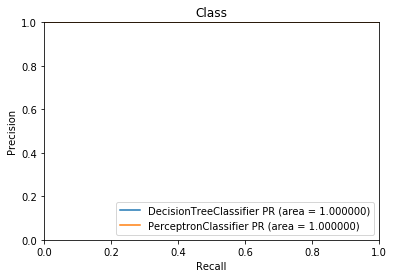

In [223]:
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_dts1[:,0])
aps_dts1 = average_precision_score(y_test_invers,probas_dts1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier', aps_dts1)) 
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_slf1[:,0])
aps_slf1 = average_precision_score(y_test_invers,probas_slf1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('PerceptronClassifier',  aps_slf1)) 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy')
plt.show()

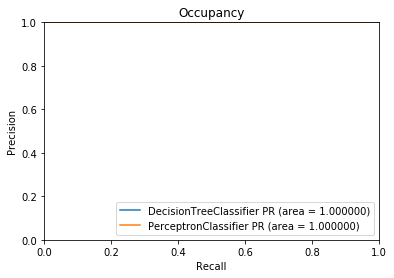

In [224]:
precision, recall, thresholds = precision_recall_curve(y_test, probas_dts0[:,1])
aps_dts0 = average_precision_score(y_test,probas_dts0[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier', aps_dts0)) 
precision, recall, thresholds = precision_recall_curve(y_test, probas_slf1[:,1])
aps_slf1 = average_precision_score(y_test,probas_slf1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('PerceptronClassifier',  aps_slf1)) 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy')
plt.show()

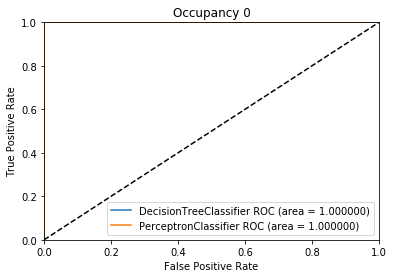

In [220]:
tpr, fpr, thresholds = roc_curve(y_test, probas_dts0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc)) 
tpr, fpr, thresholds = roc_curve(y_test, probas_slf0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('PerceptronClassifier', roc_auc))   
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy 0')
plt.show()



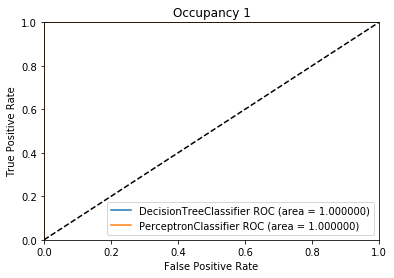

In [222]:
fpr, tpr, thresholds = roc_curve(y_test, probas_dts1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc)) 
fpr, tpr, thresholds = roc_curve(y_test, probas_slf1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('PerceptronClassifier', roc_auc))   
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy 1')
plt.show()

Маленькое количество данных

##### 9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

имеют одинаковые показатели качества(если увеличить количество данных, то они также будут иметь примерные показатели)
